In [21]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping


In [22]:
df=pd.read_csv("/content/BANKASIA.csv",parse_dates=['DATE'])
df.head()

#       DATE TRADING CODE  LTP*  ...   YCP  TRADE  VALUE (mn)   VOLUME
0  439 2018-05-08     BANKASIA  17.1  ...  17.5    158       6.782  400,155
1  438 2018-06-08     BANKASIA  16.9  ...  16.8    160      11.494  673,813
2  437 2018-07-08     BANKASIA  17.2  ...  16.9    218      16.415  955,798
3  436 2018-08-08     BANKASIA  17.4  ...  17.2    242      16.895  982,419
4  435 2018-09-08     BANKASIA  17.3  ...  17.3    336      14.668  839,199

[5 rows x 12 columns]

In [23]:
# Sort DataFrame by date
df = df.sort_values('DATE')

# Double check the result
df.head()


#       DATE TRADING CODE  LTP*  ...   YCP  TRADE  VALUE (mn)   VOLUME
36  403 2018-01-10     BANKASIA  16.7  ...  16.8     57       2.271  135,168
59  380 2018-01-11     BANKASIA  17.1  ...  17.4    134       4.479  257,851
37  402 2018-02-10     BANKASIA  16.7  ...  16.8     52       1.806  107,644
79  360 2018-02-12     BANKASIA  17.5  ...  17.3     37       1.489   85,673
16  423 2018-03-09     BANKASIA  17.4  ...  17.5    262      11.665  675,112

[5 rows x 12 columns]

In [24]:
df = df.set_index('DATE')
df.head(3)

# TRADING CODE  LTP*  HIGH  ...   YCP  TRADE  VALUE (mn)   VOLUME
DATE                                      ...                                  
2018-01-10  403     BANKASIA  16.7  17.0  ...  16.8     57       2.271  135,168
2018-01-11  380     BANKASIA  17.1  17.8  ...  17.4    134       4.479  257,851
2018-02-10  402     BANKASIA  16.7  16.9  ...  16.8     52       1.806  107,644

[3 rows x 11 columns]

In [25]:
df['daily_ret'] = df['CLOSEP*'].pct_change()
df['daily_ret'] = df['daily_ret'].fillna(0.0)

In [26]:
df['volatility']= df['daily_ret'].rolling(window=21).std()
df['volatility'] = df['volatility'].fillna(0.0)

In [27]:
df['volatility'] = df['volatility']*100

In [28]:
import matplotlib.pyplot as plt 

In [29]:
df=df.reset_index()['volatility']

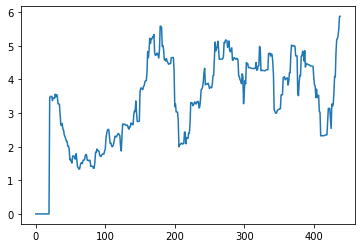

In [30]:
plt.plot(df)

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(np.array(df).reshape(-1,1))

In [32]:
##splitting dataset into train and test split where train=70 percent and test=30 percent
training_size=int(len(df)*0.70)
test_size=len(df)-training_size
train_data,test_data=df[0:training_size,:],df[training_size:len(df),:1]




In [33]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [],[]
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [34]:

# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [35]:

print(X_train.shape), print(y_train.shape)

(206, 100)
(206,)


(None, None)

In [36]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [37]:
X_test.shape

(31, 100, 1)

In [38]:
from google.colab import drive

In [39]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls "/content/drive/My Drive"

In [78]:
filepath1 = "/content/drive/MyDrive/StockPriceEnsembleDL/modelsbankAsia/model1.h5"
filepath2 = "/content/drive/MyDrive/StockPriceEnsembleDL/modelsbankAsia/model2.h5"
filepath3 = "/content/drive/MyDrive/StockPriceEnsembleDL/modelsbankAsia/model3.h5"

In [79]:

#1D cnn model
# define model
model1 = Sequential()
model1.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(100,1)))
model1.add(MaxPooling1D(pool_size=2))
model1.add(Flatten())
model1.add(Dense(50, activation='relu'))
model1.add(Dense(1))
model1.compile(optimizer='adam', loss='mse')
model1.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=32,verbose=1)


Epoch 1/100
7/7 [==============================] - 1s 31ms/step - loss: 0.1856 - val_loss: 0.0426
Epoch 2/100
7/7 [==============================] - 0s 12ms/step - loss: 0.0359 - val_loss: 0.1262
Epoch 3/100
7/7 [==============================] - 0s 11ms/step - loss: 0.0253 - val_loss: 0.0517
Epoch 4/100
7/7 [==============================] - 0s 11ms/step - loss: 0.0199 - val_loss: 0.0646
Epoch 5/100
7/7 [==============================] - 0s 11ms/step - loss: 0.0153 - val_loss: 0.0570
Epoch 6/100
7/7 [==============================] - 0s 13ms/step - loss: 0.0159 - val_loss: 0.0463
Epoch 7/100
7/7 [==============================] - 0s 11ms/step - loss: 0.0147 - val_loss: 0.0577
Epoch 8/100
7/7 [==============================] - 0s 11ms/step - loss: 0.0113 - val_loss: 0.0417
Epoch 9/100
7/7 [==============================] - 0s 11ms/step - loss: 0.0105 - val_loss: 0.0400
Epoch 10/100
7/7 [==============================] - 0s 11ms/step - loss: 0.0103 - val_loss: 0.0374
Epoch 11/100
7/7 [=

In [80]:
model1.save(filepath1)

In [ ]:
#LSTM  model
model2=Sequential()
model2.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model2.add(LSTM(50,return_sequences=True))
model2.add(LSTM(50))
model2.add(Dense(1))
model2.compile(loss='mean_squared_error', optimizer='adam')
model2.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=32,verbose=1)

Epoch 1/100
7/7 [==============================] - 6s 297ms/step - loss: 0.2727 - val_loss: 0.1419
Epoch 2/100
7/7 [==============================] - 1s 140ms/step - loss: 0.0519 - val_loss: 0.0519
Epoch 3/100
7/7 [==============================] - 1s 138ms/step - loss: 0.0266 - val_loss: 0.0472
Epoch 4/100
7/7 [==============================] - 1s 136ms/step - loss: 0.0155 - val_loss: 0.0504
Epoch 5/100
7/7 [==============================] - 1s 140ms/step - loss: 0.0154 - val_loss: 0.0427
Epoch 6/100
7/7 [==============================] - 1s 136ms/step - loss: 0.0152 - val_loss: 0.0469
Epoch 7/100
7/7 [==============================] - 1s 139ms/step - loss: 0.0134 - val_loss: 0.0423
Epoch 8/100
7/7 [==============================] - 1s 142ms/step - loss: 0.0122 - val_loss: 0.0416
Epoch 9/100
7/7 [==============================] - 1s 136ms/step - loss: 0.0116 - val_loss: 0.0416
Epoch 10/100
7/7 [==============================] - 1s 136ms/step - loss: 0.0109 - val_loss: 0.0402
Epoch 11/

In [45]:
model2.save(filepath2)

In [46]:
#BILSTM model
model3=Sequential()
model3.add(Bidirectional(LSTM(50,return_sequences=True,input_shape=(100,1))))
model3.add(Bidirectional(LSTM(50,return_sequences=True)))
model3.add(Bidirectional(LSTM(50)))
model3.add(Dense(1))
model3.compile(loss='mean_squared_error', optimizer='adam')
model3.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=32,verbose=1)

Epoch 1/100
7/7 [==============================] - 13s 560ms/step - loss: 0.2527 - val_loss: 0.1356
Epoch 2/100
7/7 [==============================] - 2s 237ms/step - loss: 0.0237 - val_loss: 0.0354
Epoch 3/100
7/7 [==============================] - 2s 242ms/step - loss: 0.0265 - val_loss: 0.0640
Epoch 4/100
7/7 [==============================] - 2s 237ms/step - loss: 0.0172 - val_loss: 0.0337
Epoch 5/100
7/7 [==============================] - 2s 239ms/step - loss: 0.0126 - val_loss: 0.0380
Epoch 6/100
7/7 [==============================] - 2s 240ms/step - loss: 0.0102 - val_loss: 0.0338
Epoch 7/100
7/7 [==============================] - 2s 245ms/step - loss: 0.0093 - val_loss: 0.0309
Epoch 8/100
7/7 [==============================] - 2s 238ms/step - loss: 0.0085 - val_loss: 0.0303
Epoch 9/100
7/7 [==============================] - 2s 240ms/step - loss: 0.0088 - val_loss: 0.0276
Epoch 10/100
7/7 [==============================] - 2s 238ms/step - loss: 0.0084 - val_loss: 0.0253
Epoch 11

In [47]:
model3.save(filepath3)

In [48]:
from keras.models import load_model

In [49]:
# create list of loaded models use  load_model() 
all_models = list()
for i in range(3):
  filename = '/content/drive/MyDrive/StockPriceEnsembleDL/modelsbankAsia/model'+str(i+1)+'.h5'
  model = load_model(filename)
  all_models.append(model)

In [50]:
print(len(all_models))

3


In [51]:
# perform test prediction with per models 
#model1
f1 = '/content/drive/MyDrive/StockPriceEnsembleDL/modelsbankAsia/model1.h5'
model = load_model(f1)


In [52]:

test_preds = model.predict(X_test)
print(test_preds.shape)
print(type(test_preds))

(31, 1)
<class 'numpy.ndarray'>


In [53]:
test_preds = np.reshape(test_preds,(1, test_preds.size))
test_predict=scaler.inverse_transform(test_preds)
X = np.reshape(ytest,(1, ytest.size))
Y_test =scaler.inverse_transform(X)

In [54]:
#Y_test = Y_test.transpose()
RMSE = math.sqrt(mean_squared_error(Y_test,test_preds))
RMSE

2.955943238189964

In [55]:

# stacked generalization with linear meta model on blobs dataset
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from keras.models import load_model
from keras.utils import to_categorical
from numpy import dstack

In [56]:
def DataPrep(datax):
  test_preds = np.reshape(datax,(1, datax.size))
  test_predict=scaler.inverse_transform(test_preds)
  return datax



In [57]:
def stacked_dataset(allModels, inputX):
	stackX = None
	for model in allModels:
		# make prediction
		yhat = model.predict(inputX, verbose=0)
		# stack predictions into [rows, members, probabilities]
		if stackX is None:
			stackX = yhat
		else:
			stackX = dstack((stackX, yhat))
	# flatten predictions to [rows, members x probabilities]
	
	return stackX

In [58]:
# fit a model based on the outputs from the ensemble members
def fit_stacked_model(members, inputX, inputy):
	# create dataset using ensemble
	stackedX = stacked_dataset(members, inputX)
	# fit standalone model
	model = LinearRegression()
	model.fit(stackedX, inputy)
	return model

In [59]:
#make prediction with stacked model

def stacked_prediction(members, model, inputX):
  #inputX = DataPrep(inputX)
	stackedX = stacked_dataset(members,inputX)
	# make a prediction
	yhat = model.predict(stackedX)
	return yhat

In [60]:
#started from here
for i in range(len(all_models)):
	model = all_models[i]
	for layer in model.layers:
		# make not trainable
		layer.trainable = False
		# rename to avoid 'unique layer name' issue
		layer._name = 'ensemble_' + str(i+1) + '_' + layer.name

In [61]:

# define stacked model from multiple member input models
def define_stacked_model(members):
	# update all layers in all models to not be trainable
	for i in range(len(members)):
		model = members[i]
		for layer in model.layers:
			# make not trainable
			layer.trainable = False
			# rename to avoid 'unique layer name' issue
			layer._name = 'ensemble_' + str(i+1) + '_' + layer.name
	# define multi-headed input
	ensemble_visible = [model.input for model in members]
	# concatenate merge output from each model
	ensemble_outputs = [model.output for model in members]
	merge = concatenate(ensemble_outputs)
	hidden = Dense(10, activation='relu')(merge)
	output = Dense(3)(hidden)
	model = Model(inputs=ensemble_visible, outputs=output)
	model = Model(inputs=ensemble_visible, outputs=output)
	# plot graph of ensemble
	plot_model(model, show_shapes=True, to_file='model_graph.png')
	# compile
	# compile
	model.compile(optimizer='adam', loss='mse')
	return model

In [62]:

def fit_stacked_model(model, inputX, inputy):
	# prepare input data
	X = [inputX for _ in range(len(model.input))]
	# encode output data
	#inputy_enc = to_categorical(inputy)
	# fit model
	model.fit(X, inputy, epochs=300, verbose=0)

In [63]:
stacked_model = define_stacked_model(all_models)

In [64]:
#fit stacked model on test dataset
fit_stacked_model(stacked_model, X_test,ytest)

In [65]:

def predict_stacked_model(model, inputX):
	# prepare input data
	X = [inputX for _ in range(len(model.input))]
	# make prediction
	return model.predict(X)

In [66]:

# make predictions and evaluate
yhat = predict_stacked_model(stacked_model, X_test)
yhat = DataPrep(yhat)
yhat
#Y_test = DataPrep(Y_test)
#RMSE = math.sqrt(mean_squared_error(Y_test,yhat))
#RMSE
#print('Stacked Test Accuracy: %.3f' % RMSE)

array([[0.17647123, 0.5672642 , 0.6183601 ],
       [0.17747024, 0.5640221 , 0.6144016 ],
       [0.18225363, 0.55614465, 0.6046882 ],
       [0.18587983, 0.5493736 , 0.5963588 ],
       [0.1942907 , 0.53485096, 0.57846797],
       [0.20054522, 0.5228705 , 0.5637366 ],
       [0.20498855, 0.5140598 , 0.55290914],
       [0.20792791, 0.5080127 , 0.54548234],
       [0.20952642, 0.50304884, 0.53941876],
       [0.21021573, 0.49900436, 0.534503  ],
       [0.21028727, 0.49588913, 0.5307352 ],
       [0.2100883 , 0.49409592, 0.528576  ],
       [0.209854  , 0.4921801 , 0.5262702 ],
       [0.2097466 , 0.4907437 , 0.5245385 ],
       [0.20596072, 0.4931249 , 0.5275692 ],
       [0.19997767, 0.5015981 , 0.53805095],
       [0.19491889, 0.50955606, 0.5478726 ],
       [0.1906825 , 0.5165857 , 0.55653924],
       [0.19007722, 0.51805204, 0.55833584],
       [0.19244194, 0.5147923 , 0.5543009 ],
       [0.18899284, 0.5221098 , 0.56328356],
       [0.18677223, 0.5285104 , 0.57110864],
       [0.

In [67]:
  yhat=scaler.inverse_transform(yhat)

In [68]:
x, y, z = yhat.T

In [69]:
avg = (x+y+z)/3

In [70]:
avg.shape

(31,)

In [71]:
avg = np.reshape(avg,(1, avg.size))
x = np.reshape(x,(1, x.size))
y = np.reshape(y,(1, y.size))
z = np.reshape(z,(1, z.size))

In [ ]:
avg

array([[3.4504635, 3.3986309, 3.30855  , 3.2891223, 3.168801 , 3.094567 ,
        3.0225115, 2.986049 , 2.920206 , 2.8853624, 2.8291676, 2.8129613,
        2.7862434, 2.7701874, 2.7815208, 2.883259 , 2.9909363, 3.067057 ,
        3.1296759, 3.1679928, 3.2664328, 3.4776518, 3.5840614, 3.6869154,
        3.9030502, 4.039326 , 4.233047 , 4.502724 , 4.643006 , 4.785148 ,
        4.857019 ]], dtype=float32)

In [ ]:
Y_test

array([[3.53212995, 3.04321207, 3.02770565, 2.3230243 , 2.32658648,
        2.32658648, 2.32658648, 2.32658648, 2.32658648, 2.33773148,
        2.35027871, 2.35027871, 2.35481227, 2.77898744, 3.14170329,
        3.12989653, 3.14238003, 2.8364168 , 2.54126749, 3.27112501,
        3.20844844, 3.26038413, 3.60986297, 4.08762393, 4.07599872,
        4.80509285, 5.18311458, 5.21469138, 5.29516064, 5.49747462,
        5.87037587]])

In [72]:
RMSE = math.sqrt(mean_squared_error(Y_test,avg))
RMSE

1.2351690606651775

In [73]:
RMSE = math.sqrt(mean_squared_error(Y_test,x))
RMSE

2.5702360512043194

In [74]:
RMSE = math.sqrt(mean_squared_error(Y_test,y))
RMSE

0.8756138634024244

In [75]:
RMSE = math.sqrt(mean_squared_error(Y_test,z))
RMSE

0.8139121682330397

In [77]:

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(Y_test,z)
print('MAE: %f' % mae)


MAE: 0.680666
